In [3]:
import pandahouse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator_20220320'
}

In [9]:
q = '''SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions 
WHERE toDate(time) between '2022-03-08' and '2022-03-14'
    and exp_group in (2,3)
GROUP BY exp_group, user_id
'''

In [10]:
df = pandahouse.read_clickhouse(q, connection=connection)
df

,exp_group,user_id,likes,views,ctr
0,3,115383,11,36,0.305556
1,3,123580,15,92,0.163043
2,2,131473,26,148,0.175676
3,2,23985,12,66,0.181818
4,2,24523,17,120,0.141667
...,...,...,...,...,...
17044,3,122008,4,31,0.129032
17045,2,25383,16,57,0.280702
17046,3,122190,25,74,0.337838
17047,2,108927,8,33,0.242424


In [11]:
df.groupby('exp_group')['user_id'].nunique()

exp_group
2    8480
3    8569
Name: user_id, dtype: int64

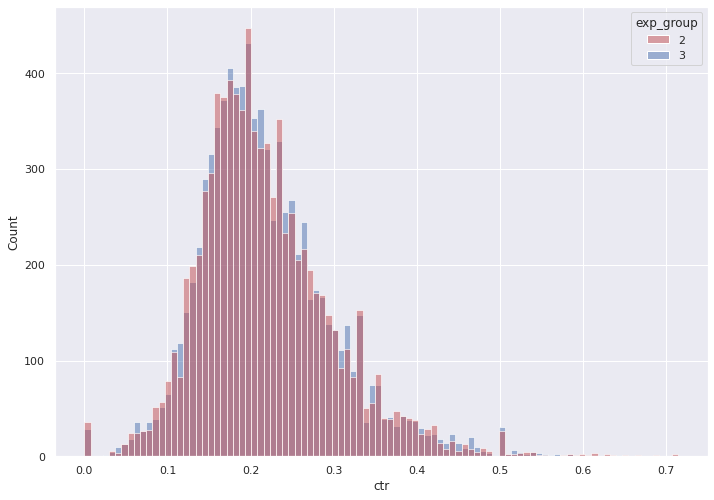

In [12]:
# Сделаем графики в seaborn покрупнее
sns.set(rc={'figure.figsize':(11.7,8.27)})

groups = sns.histplot(data = df, 
              x='ctr', 
              hue='exp_group', 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

In [13]:
# проведем 10 000 АА тестов и запишем значения p-value  в одноименную переменную 

p_values = []

for _ in range(10000):
    group_1 = df[df.exp_group == 2].sample(500, replace=True)
    group_2 = df[df.exp_group == 3].sample(500, replace=True)
    p_values.append(stats.ttest_ind(group_1.ctr, group_2.ctr, equal_var=False).pvalue)

<AxesSubplot:ylabel='Count'>

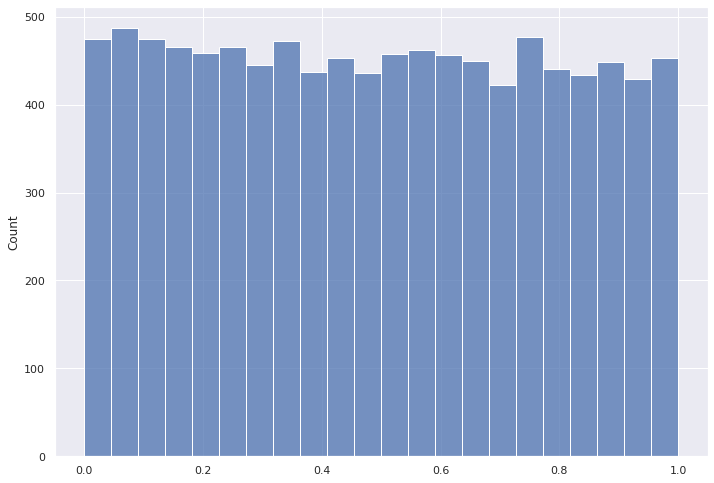

In [26]:
sns.histplot(p_values)

In [27]:
# На графике видим, что p-value распределено достаточно равномерно 
# Посмотрим в скольки процентах случаев p-value оказывается меньше или равен alpпф = 0,05

count_values = 0

for i in p_values: 
    if i <= 0.05: 
        count_values += 1 

print(count_values / 10000 * 100)

5.1


In [28]:
print(f'Мы можем видеть, что процент p-value меньше 0.05 в {round(count_values / 10000 * 100, 2)}% случаев, это значит, что в почти в {round(100 - count_values / 10000 * 100, 2)}% процентах случаев тест не показывает отличий между группами, значит система спитевания работает исправно')

Мы можем видеть, что процент p-value меньше 0.05 в 5.1% случаев, это значит, что в почти в 94.9% процентах случаев тест не показывает отличий между группами, значит система спитевания работает исправно
